In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

import seaborn as sns

In [2]:
df=pd.read_csv("../data/heart_disease_uci.csv")

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.describe(include='O')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [6]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
print(round(df.isnull().sum() * 100 / len(df), 2).astype(str) + '%')


id            0.0%
age           0.0%
sex           0.0%
dataset       0.0%
cp            0.0%
trestbps     6.41%
chol         3.26%
fbs          9.78%
restecg      0.22%
thalch       5.98%
exang        5.98%
oldpeak      6.74%
slope       33.59%
ca          66.41%
thal        52.83%
num           0.0%
dtype: object


In [8]:
#fill missing with mean for percentage less than 10%
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for column in num_cols:
    df[column] = df[column].fillna(df[column].mean())


In [9]:
# fill with mode for categorical
cat_cols = [ 'restecg', 'fbs', 'exang']
for column in cat_cols:
    df[column] = df[column].fillna(df[column].mode()[0])


C:\Users\ahmed\AppData\Local\Temp\ipykernel_14392\2988341695.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0])


In [10]:
# fill with KNNImputer for categorical with percentage more than 30%

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# df_new = df.copy()


knn_cols = ['slope', 'ca', 'thal']

le_thal = LabelEncoder()
df['thal'] = le_thal.fit_transform(df['thal'].astype(str))

le_slope = LabelEncoder()
df['slope'] = le_slope.fit_transform(df['slope'].astype(str))

knn_imputer = KNNImputer(n_neighbors=5)
df[knn_cols] = knn_imputer.fit_transform(df[knn_cols])

print(pd.DataFrame(df.isnull().sum(), columns=['Missing Values']))

#for visualization 
# df_viz = df_new.copy()
df['thal'] = le_thal.inverse_transform(df['thal'].astype(int))
df['slope'] = le_slope.inverse_transform(df['slope'].astype(int))

          Missing Values
id                     0
age                    0
sex                    0
dataset                0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalch                 0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
num                    0


In [11]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
df.drop(columns=['id'],inplace=True)

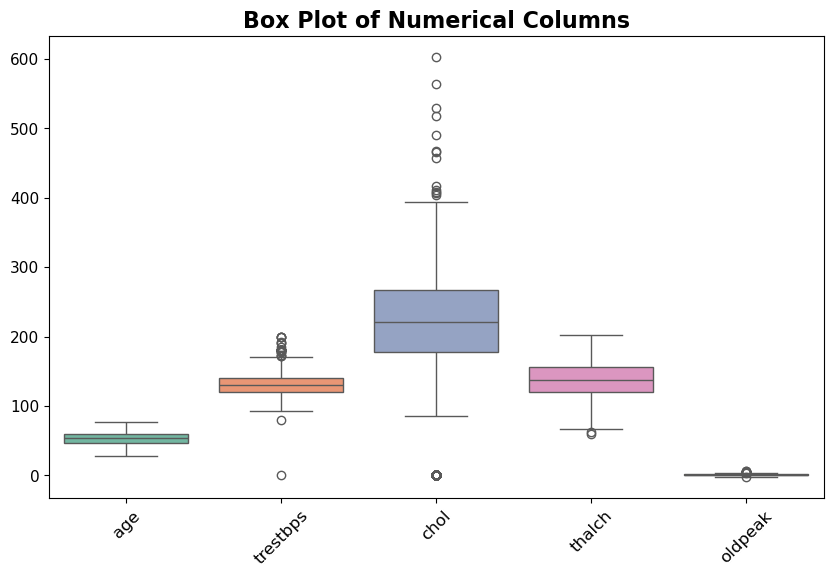

In [13]:
# Numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols], palette="Set2")

plt.title("Box Plot of Numerical Columns", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=11)

plt.show()

In [14]:
fig = px.box(df, y=df['trestbps'], title='trestbps Distribution')
fig.show()

In [15]:
df['chol'] = df['chol'].where((df['chol'] >= 85) & (df['chol'] <= 360), np.nan)

df['chol'].fillna(df['chol'].mean(), inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14392\485758416.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [16]:
df['trestbps'] = df['trestbps'].where((df['trestbps'] >= 92) & (df['trestbps'] <= 170), np.nan)

df['trestbps'].fillna(df['trestbps'].mean(), inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14392\4181841889.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [17]:
df['oldpeak'] = df['oldpeak'].where((df['oldpeak'] >= 0) & (df['oldpeak'] <= 3.7), np.nan)

df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14392\2260157930.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [19]:
# Remove impossible rows where both trestbps and chol are zero
# before_shape = df_new.shape
df= df[~((df['trestbps'] == 0) & (df['chol'] == 0))]
df.shape

# print(f"Rows before: {before_shape[0]}, Rows after: {after_shape[0]}")

(920, 15)

### DATA VISUALIZATION


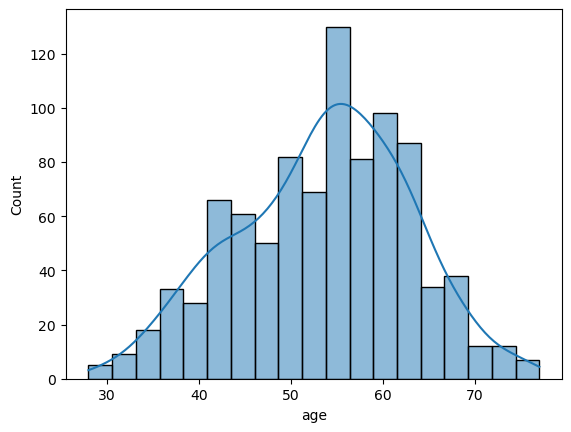

In [52]:
sns.histplot(df['age'], kde=True)
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_14392\828882898.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




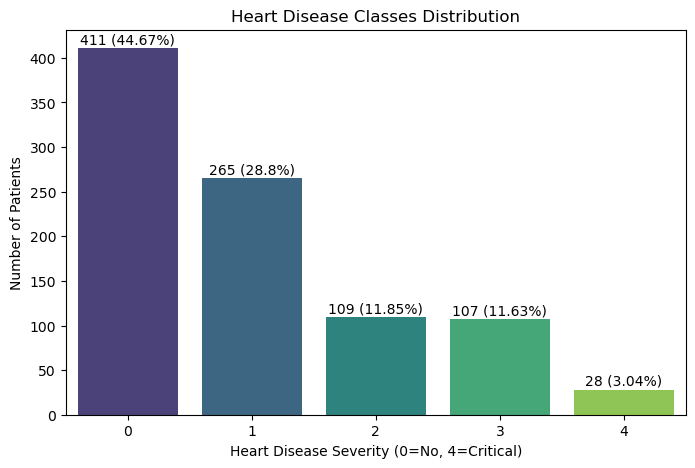

In [51]:
class_counts = df['num'].value_counts().sort_index()
class_percent = round(class_counts / len(df) * 100, 2)


plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Heart Disease Classes Distribution")
plt.xlabel("Heart Disease Severity (0=No, 4=Critical)")
plt.ylabel("Number of Patients")
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, f"{v} ({class_percent[i]}%)", ha='center')
plt.show()

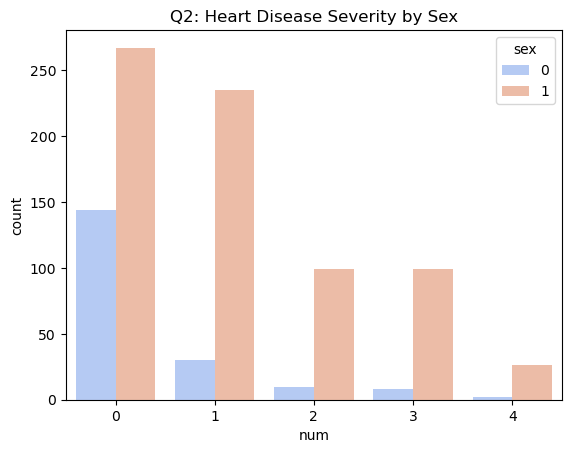

In [35]:
plt.figure()
sns.countplot(x='num', hue='sex', data=df, palette='coolwarm')
plt.title("Q2: Heart Disease Severity by Sex")
plt.show()



### How does age relate to disease severity?


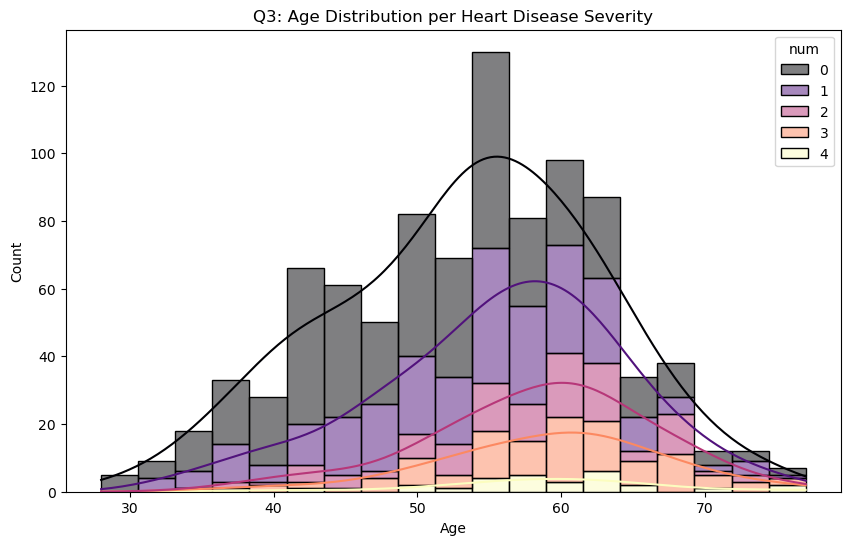

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='num', multiple='stack', palette='magma', kde=True)
plt.title("Q3: Age Distribution per Heart Disease Severity")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Which chest pain type is most risky?


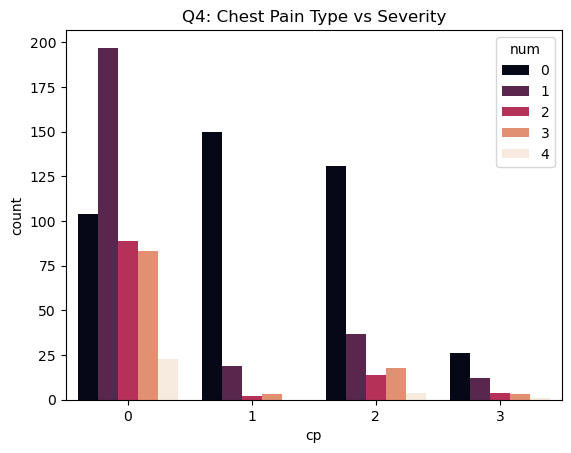

In [42]:


plt.figure()
sns.countplot(x='cp', hue='num', data=df, palette='rocket')
plt.title("Q4: Chest Pain Type vs Severity")
plt.show()




### Max heart rate achieved vs severity


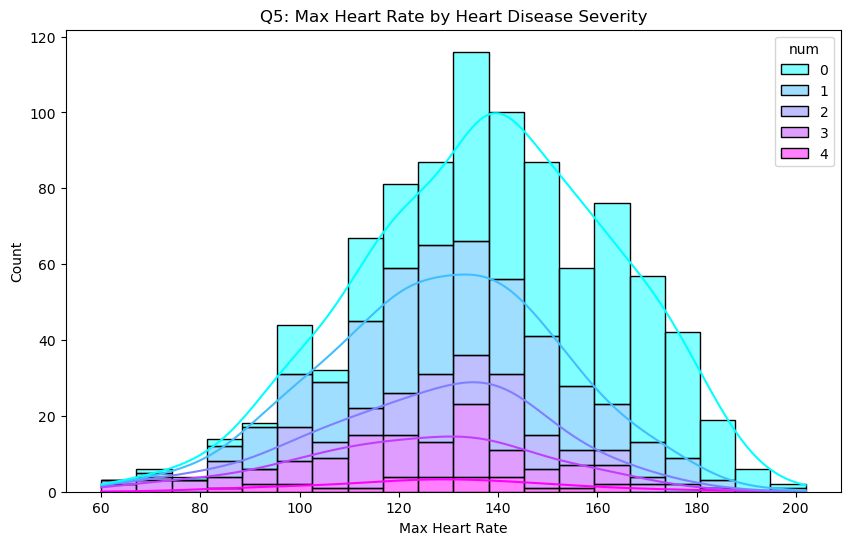

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='thalch', hue='num', multiple='stack', palette='cool', kde=True)
plt.title("Q5: Max Heart Rate by Heart Disease Severity")
plt.xlabel("Max Heart Rate")
plt.ylabel("Count")
plt.show()

### Fasting blood sugar impact


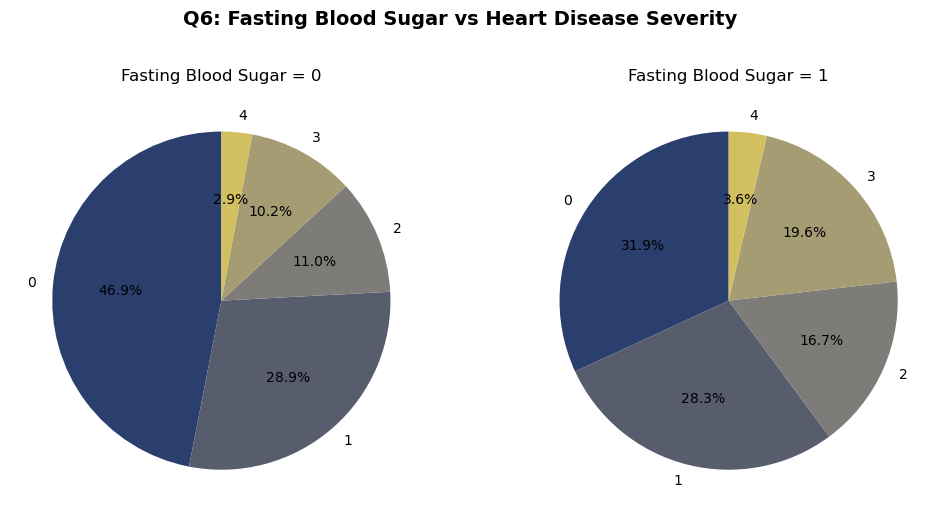

In [44]:
plt.figure(figsize=(12,6))

fbs_counts = df.groupby(['fbs','num']).size().reset_index(name='count')

for i, fbs_value in enumerate(fbs_counts['fbs'].unique()):
    plt.subplot(1, 2, i+1)
    data = fbs_counts[fbs_counts['fbs']==fbs_value]
    plt.pie(data['count'], 
            labels=data['num'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette('cividis', len(data)))
    plt.title(f"Fasting Blood Sugar = {fbs_value}")

plt.suptitle("Q6: Fasting Blood Sugar vs Heart Disease Severity", fontsize=14, fontweight='bold')
plt.show()

### Resting ECG vs Heart Disease Severity


Text(0.5, 0.98, 'Q7: Resting ECG vs Heart Disease Severity')

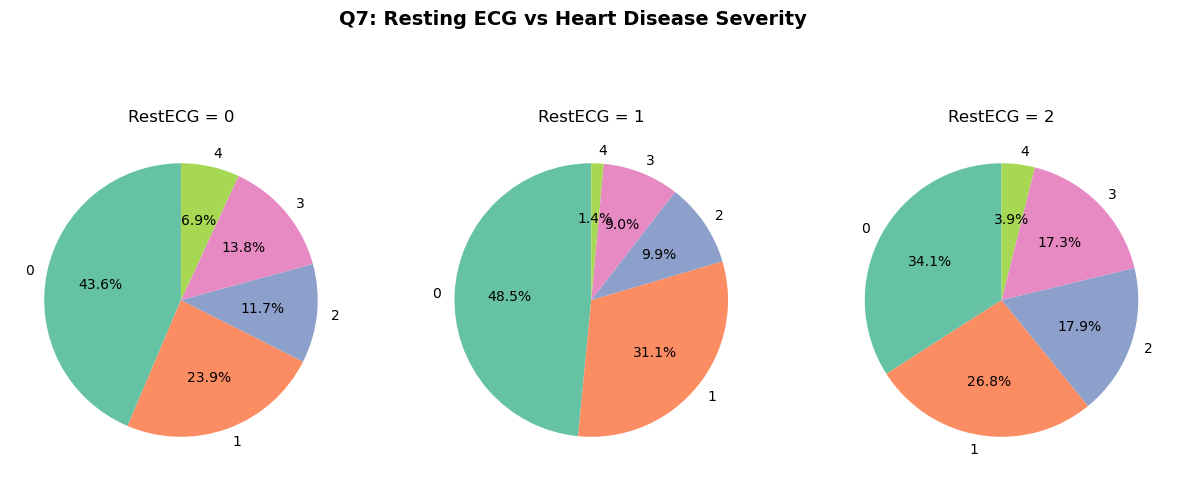

In [45]:


plt.figure(figsize=(15,6))

restecg_counts = df.groupby(['restecg','num']).size().reset_index(name='count')

unique_restecg = restecg_counts['restecg'].unique()

for i, restecg_value in enumerate(unique_restecg):
    plt.subplot(1, len(unique_restecg), i+1)
    data = restecg_counts[restecg_counts['restecg']==restecg_value]
    plt.pie(data['count'], 
            labels=data['num'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette('Set2', len(data)))
    plt.title(f"RestECG = {restecg_value}")

plt.suptitle("Q7: Resting ECG vs Heart Disease Severity", fontsize=14, fontweight='bold')


### CHECKING OUTLIERS


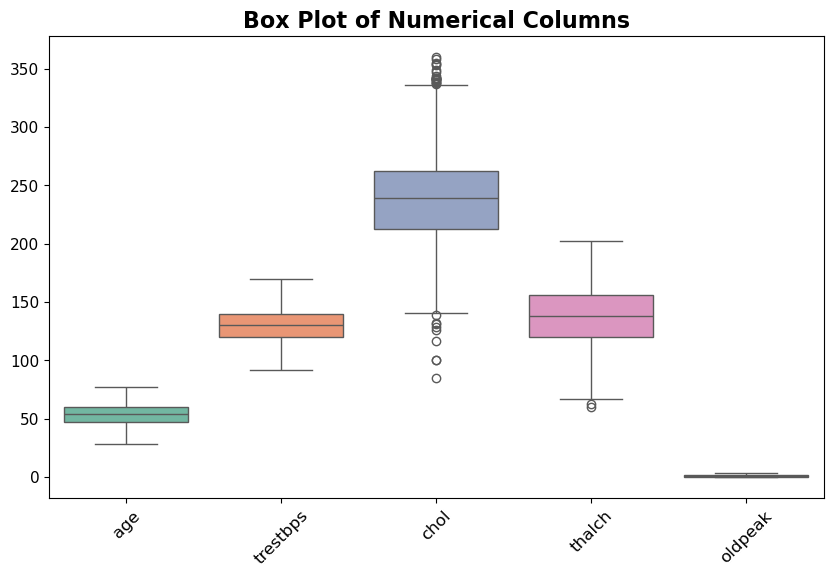

In [46]:
# Numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols], palette="Set2")

plt.title("Box Plot of Numerical Columns", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=11)

plt.show()

In [50]:
# Numerical columns

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# رسم Box Plot لكل الأعمدة
fig = px.box(df, y=num_cols, title="Box Plot of Numerical Columns")

# تنسيق الشكل
fig.update_layout(
    title_font_size=16,
    title_font_color='black',
    xaxis_title="Features",
    yaxis_title="Values",
    xaxis=dict(tickangle=45),
    width=900,
    height=600
)

fig.show()


In [ ]:


# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , root_mean_squared_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import XGBClassifier



In [21]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding 
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int32  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    int32  
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int32  
 12  ca        920 non-null    float64
 13  thal      920 non-null    int32  
 14  num       920 non-null    int64  
dtypes: bool(2), float64(5), int32(6), int64(2)
memory usage: 73.8 KB


In [23]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int32  
 2   dataset   920 non-null    int32  
 3   cp        920 non-null    int32  
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    int32  
 7   restecg   920 non-null    int32  
 8   thalch    920 non-null    float64
 9   exang     920 non-null    int32  
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int32  
 12  ca        920 non-null    float64
 13  thal      920 non-null    int32  
 14  num       920 non-null    int64  
dtypes: float64(5), int32(8), int64(2)
memory usage: 79.2 KB


In [31]:
df.to_csv("../data/new_data.csv", index=False)


In [25]:
df_bin = df.copy()
df_bin['target_bin'] = (df_bin['num'] != 0).astype(int)  # 0 -> 0, else -> 1

X = df_bin.drop(columns=['num','target_bin'], axis=1)
y = df_bin['target_bin']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:


log_cl = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_cl.fit(X_train, y_train)
# Train report
y_train_pred = log_cl.predict(X_train)
print("Train Report:")
print(classification_report(y_train, y_train_pred))




# Test report
y_test_pred = log_cl.predict(X_test)
print("Test Report:")
print(classification_report(y_test, y_test_pred))



Train Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       329
           1       0.84      0.83      0.83       407

    accuracy                           0.82       736
   macro avg       0.81      0.82      0.81       736
weighted avg       0.82      0.82      0.82       736

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        82
           1       0.85      0.83      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.



In [27]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 
                 'solver': ['liblinear', 'lbfgs']}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                       param_grid_lr, cv=5, scoring='f1_macro')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best Logistic Regression CV Score:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(X_test)
print("\n=== Logistic Regression ===")
print("Train Report:\n", classification_report(y_train, grid_lr.predict(X_train)))
print("Test Report:\n", classification_report(y_test, y_pred_lr))


Best Logistic Regression params: {'C': 0.01, 'solver': 'lbfgs'}
Best Logistic Regression CV Score: 0.8197763411298002

=== Logistic Regression ===
Train Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       329
           1       0.84      0.85      0.85       407

    accuracy                           0.83       736
   macro avg       0.83      0.83      0.83       736
weighted avg       0.83      0.83      0.83       736

Test Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        82
           1       0.84      0.85      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_macro'
)

grid_dt.fit(X_train, y_train)

print("Best Decision Tree params:", grid_dt.best_params_)
print("Best Decision Tree CV Score:", grid_dt.best_score_)

# --- Train Report ---
print("\n=== Decision Tree (Best Model) ===")
print("Train Report:\n", classification_report(y_train, grid_dt.predict(X_train)))

# --- Test Report ---
print("Test Report:\n", classification_report(y_test, grid_dt.predict(X_test)))

Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 5}
Best Decision Tree CV Score: 0.7865332079262264

=== Decision Tree (Best Model) ===
Train Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       329
           1       0.86      0.88      0.87       407

    accuracy                           0.85       736
   macro avg       0.85      0.85      0.85       736
weighted avg       0.85      0.85      0.85       736

Test Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75        82
           1       0.79      0.81      0.80       102

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



In [29]:
xgb_model = XGBClassifier( n_estimators=100)

xgb_model.fit(
    X_train, y_train
    
)
train_preds_xgb = xgb_model.predict(X_train)
test_preds_xgb = xgb_model.predict(X_test)

print("Train Report:")
print(classification_report(y_train, train_preds_xgb))

# print(round(np.sqrt(mean_squared_error(y_train, train_preds_xgb)),20))
# print(round(np.sqrt(mean_squared_error(X_train, train_preds_xgb)),20))

print("Test Report:")
print(classification_report(y_test, test_preds_xgb))
# print(round(np.sqrt(mean_squared_error(X_test, test_preds_xgb)),20))
# print(round(np.sqrt(mean_squared_error(y_test, test_preds_xgb)),20))

Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       407

    accuracy                           1.00       736
   macro avg       1.00      1.00      1.00       736
weighted avg       1.00      1.00      1.00       736

Test Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

